In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 – Net Force with Quadratic Drag

The drag force is given by:

$$F_d = - k_2 v |v|$$

At **terminal velocity** $v_t$, the drag balances the gravitational force:

$$|F_g| = mg = |F_d| = k_2 v_t^2$$

Solving for $v_t$:

$$v_t = \sqrt{\frac{mg}{k_2}}$$


We can now express the drag force in terms of $v_t$:


$$F_d = - (\frac{mg}{v_t^2})v|v|$$


Thus, the **net force** on the object is:

$$F = F_g + F_d = - mg \left[ 1 + \left(\frac{v|v|}{v_t^2}\right) \right]$$



In [ ]:
# 1.2 (solve 1D Newtonian EOM for (constant) free fall and quadratic drag numerically)
class particle:

    def __init__(self, t=0.0, m=1.0, y=0.0, v=0.0): # particle constructor with attributes time, mass, position, and velocity (SI units)
        self.t = t
        self.m = m
        self.y = y
        self.v = v
        
    def euler_step(self, F, dt): # Euler step to update particle attributes given general force function F(t,m,y,v) and timestep dt
        t, m, y, v, = self.t, self.m, self.y, self.v # initial time, mass, position, velocity
        a = F(t, m, y, v)/m # initial acceleration
        self.v = v + a*dt # v_(i+1) = v_i + a_i*dt
        self.y = y + v*dt # y_(i+1) = y_i + v_i*dt
        self.t = t + dt   # t_(i+1) = t_i + dt

# initial conditions and timestep
t_0 = 0
m_0 = 0.01 
y_0 = 50
v_0 = 0
dt = 0.00001

def euler_solver(F, dt): # function to solve EOM using Euler method given force function F(t,m,y,v)
    p = particle(t=t_0, m=m_0, y=y_0, v=v_0) # create particle instance with initial conditions
    ts, ys, vs = [p.t], [p.y], [p.v] # lists to store time, position, velocity values at each timestep
    while p.y > 0: # while loop terminates when pebble hits the ground (y=<0)
        p.euler_step(F, dt)
        ts.append(p.t)
        ys.append(p.y)
        vs.append(p.v)
    return np.array(ts), np.array(ys), np.array(vs)

# (constant) gravity and terminal velocity
g = 9.8
v_t = 30

F_gc = lambda t, m, y, v: - m*g # (constant) free fall force (lambda function of t, m, y, v)
F_quad = lambda t, m, y, v: - m*g*(1+(v*abs(v) /v_t**2)) # quadratic drag force

print(f'The speed at which the pebble in free fall reaches the ground is ~ {abs(euler_solver(F_gc, dt)[2][-1])} m/s')
print(f'The speed at which the pebble reaches the ground with quadratic drag is ~ {abs(euler_solver(F_quad, dt)[2][-1])} m/s')


The speed at which the pebble in free fall reaches the ground is ~ 31.305022000168915 m/s
The speed at which the pebble reaches the ground with quadratic drag is ~ 24.43502766315885 m/s


### 1.3 - Analytic Result
The EOM can be solved analytically:

$$ v = - v_t \tanh \left(\frac{gt}{v_t}+v_0 \right) = - v_t \tanh \left(\frac{gt}{v_t}\right) $$
$$ y = y_0 - \frac{v_t^2}{g} \ln \left[\cosh \left(\frac{gt}{v_t} \right) \right]

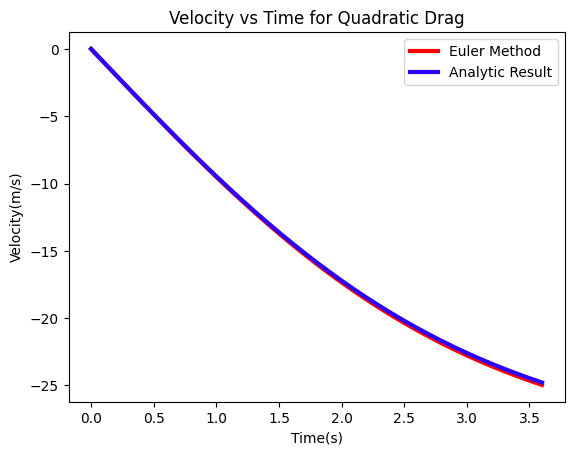

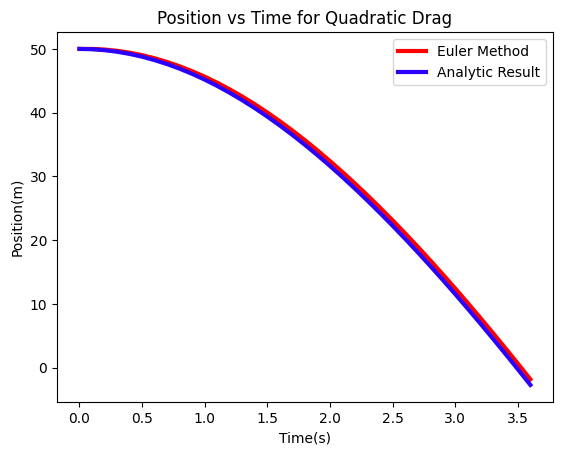

In [ ]:
# 1.3 (numeric vs analytic result)
ts, ys_euler, vs_euler = euler_solver(F_quad, dt = 0.1) #  solve EOM for quadratic drag numerically with step dt = 0.1s
# analytic results for velocity and position (at same time steps as Euler method)
vs = - v_t * np.tanh(g*ts/v_t) 
ys = y_0 - (v_t**2/g)*np.log(np.cosh(g*ts/v_t)) 

plt.plot(ts, vs_euler, color="#FF0000", ls='-', lw=3)
plt.plot(ts, vs, color="#2B00FF", ls='-', lw=3)
plt.xlabel('Time(s)')
plt.ylabel('Velocity(m/s)')
plt.title('Velocity vs Time for Quadratic Drag')
plt.legend(['Euler Method', 'Analytic Result'])
plt.show() # separate plot for velocity

plt.plot(ts, ys_euler, color="#FF0000", ls='-', lw=3)
plt.plot(ts, ys, color="#2B00FF", ls='-', lw=3)
plt.ylabel('Position(m)')
plt.xlabel('Time(s)')
plt.title('Position vs Time for Quadratic Drag')
plt.legend(['Euler Method', 'Analytic Result'])
plt.show() # separate plot for position


In [ ]:
# 2.1 (solve 1D Newtonian EOM for non-constant free fall numerically)
# constants and initial conditions
M = 5.97e24 
G = 6.67e-11
R = 6.37e6
t_0 = 0
m_0 = 0.01 
v_0 = 0
dt = 0.00001

y_0 = 50 # initial height = 50 m
F_gv = lambda t, m, y, v: - G*M*m/(R+y)**2 # non-constant free fall 
print(f'The speed at which the pebble in non-constant free fall reaches the ground is ~ {abs(euler_solver(F_gv, dt)[2][-1])} m/s')

y_0 = 2 * R # initial height = 2 * R
print(f'The speed at which the pebble in non-constant free fall with gravitational variation reaches the ground is ~ {abs(euler_solver(F_gv, dt)[2][-1])} m/s')

The speed at which the pebble in free fall with  reaches the ground is ~ 31.326431798783624 m/s
The speed at which the pebble in free fall with  reaches the ground is ~ 9129.557636063064 m/s


In [ ]:
#2.2

In [ ]:
#3,1

In [ ]:
#4.1 (solve 1D damped harmonic oscillator EOM numerically)
class damped_harmonic_oscillator:

    def __init__(self, t, x, v, a, dc, nf):
        self.t = t
        self.x = x
        self.v = v
        self.a = a
        self.dc = dc
        self.nf = nf
        
    def euler_step(self, dt):
        t, m, y, v, = self.t, self.m, self.y, self.v # initial time, mass, position, velocity
        a =  # initial acceleration
        self.a = 

def euler_solver(dt): # function to solve EOM using Euler method given force function F(t,m,y,v)
    p = particle(t=t_0, m=m_0, y=y_0, v=v_0) # create particle instance with initial conditions
    ts, ys, vs = [p.t], [p.y], [p.v] # lists to store time, position, velocity values at each timestep
    while p.y > 0: # while loop terminates when pebble hits the ground (y=<0)
        p.euler_step(F, dt)
        ts.append(p.t)
        ys.append(p.y)
        vs.append(p.v)
    return np.array(ts), np.array(ys), np.array(vs)

In [ ]:
#4.2 

In [ ]:
#4.3 